## Session 3: Machine Learning Fundamentals

In [13]:
## Importing Libraries
import numpy as np # For numerical computing
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For data visualization
from sklearn.model_selection import train_test_split # For splitting the data
from sklearn.linear_model import LinearRegression # Linear regression algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm

### Linear Regression

In [14]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Random values for number of bedrooms
y = 2 * X + 3 + np.random.randn(100, 1) * 2  # Linear relationship with added noise

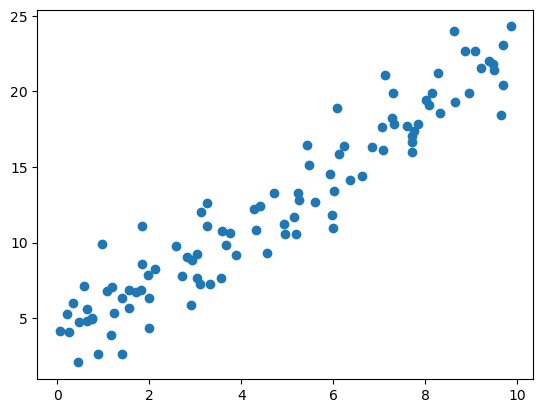

In [15]:
# Scattering the data
plt.scatter(X, y)

In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predictions
y_predicted = model.predict(X_test)

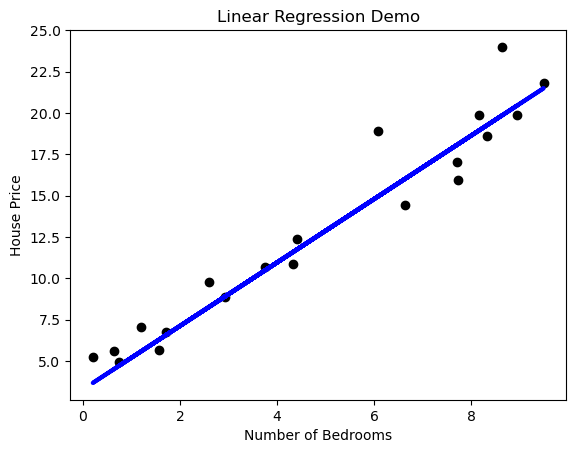

In [19]:
# Visualize
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, model.predict(X_test), color='blue', linewidth=3)
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price')
plt.title('Linear Regression Demo')
plt.show()

### Logistic Regression

In [20]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Random values for hours studied
y = (X > 5).astype(int).flatten()  # Binary outcome: Pass (1) or Fail (0)

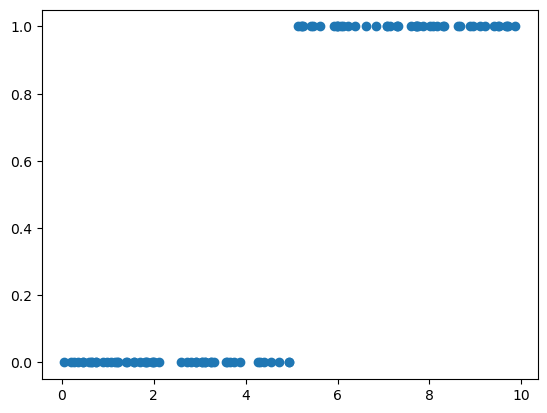

In [21]:
# Scattering the data
plt.scatter(X, y)

In [22]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred = model.predict(X_test)

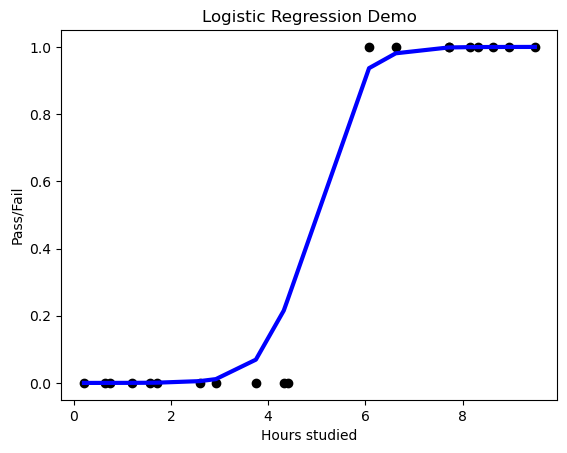

In [25]:
# Visualize
plt.scatter(X_test, y_test, color='black')
plt.plot(np.sort(X_test, axis=0), np.sort( model.predict_proba(X_test)[:,1], axis=0), color='blue', linewidth=3)
plt.xlabel('Hours studied')
plt.ylabel('Pass/Fail')
plt.title('Logistic Regression Demo')
plt.show()

### Decision Tree

In [26]:
## It is your turn, apply the decision tree classifier on the generated data above

### K-means Clustering

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [28]:
# Generate synthetic data with three clusters
data, true_labels = make_blobs(n_samples=300, centers=3, random_state=42)

In [29]:
# Apply K-Means clustering with k=3 (since we generated data with 3 centers)
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_labels = kmeans.fit_predict(data)

C:\Users\jairiidriss\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


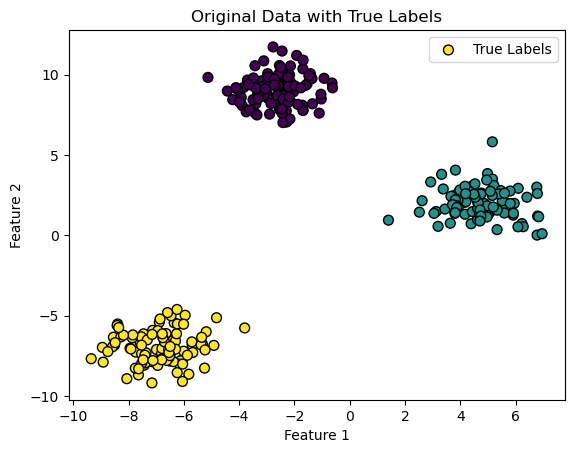

In [30]:
# Plot the original data points with true labels
plt.scatter(data[:, 0], data[:, 1], c=true_labels, cmap='viridis', edgecolors='k', s=50, label='True Labels')
plt.title('Original Data with True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

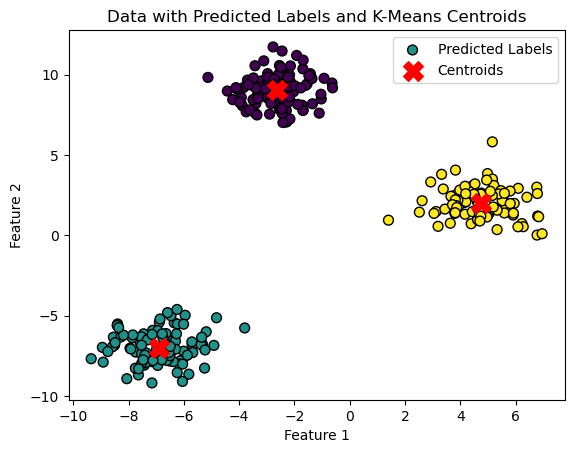

In [31]:
# Plot the data points with predicted labels from K-Means
plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis', edgecolors='k', s=50, label='Predicted Labels')
# Plot the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Data with Predicted Labels and K-Means Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Anomaly Detection using IsolationForest

In [32]:
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [33]:
# Generating a synthetic dataset
np.random.seed(42)

In [34]:
# Generate normal instances (class 0)
normal_data = np.random.normal(loc=0, scale=1, size=(800, 2))

In [35]:
# Generate anomalous instances (class 1)
anomalous_data = np.random.normal(loc=4, scale=1, size=(50, 2))

In [36]:
# Combine normal and anomalous instances
data = np.vstack([normal_data, anomalous_data])

In [37]:
# Fit the isolation forest model
clf = IsolationForest(contamination=0.05, random_state=42)
clf.fit(data)

# Predict anomaly scores for each instance
anomaly_scores = clf.decision_function(data)

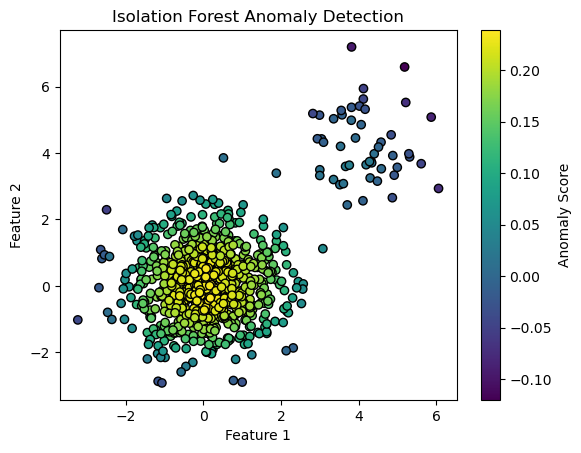

In [38]:
# Plotting the results
plt.scatter(data[:, 0], data[:, 1], c=anomaly_scores, cmap='viridis', marker='o', edgecolors='k')
plt.colorbar(label='Anomaly Score')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Semi-Supervised: Self-training example

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [40]:
# Load iris dataset
iris = load_iris()
X_train, X_unlabeled, y_train, y_unlabeled = train_test_split(
    iris.data, iris.target, test_size=0.5, random_state=42
)

In [41]:
# Train initial model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
# Use the model to label unlabeled data
pseudo_labels = model.predict(X_unlabeled)

# Add pseudo-labeled data to the training set
X_combined = np.vstack((X_train, X_unlabeled))
y_combined = np.hstack((y_train, pseudo_labels))

# Retrain the model with the combined data
model.fit(X_combined, y_combined)

# Evaluate the final model
y_pred = model.predict(X_unlabeled)
accuracy = accuracy_score(y_unlabeled, y_pred)
print(f"Accuracy after self-training: {accuracy}")

Accuracy after self-training: 0.9733333333333334


### Active Learning: Uncertainty Sampling Example

In [43]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [44]:
# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

In [45]:
# Split the data into labeled and unlabeled sets
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
    X, y, test_size=0.9, random_state=42
)

In [46]:
# Train a random forest classifier on the labeled data
model = RandomForestClassifier()
model.fit(X_labeled, y_labeled)

RandomForestClassifier()

In [47]:
# Active learning loop
for _ in range(5):  # You can adjust the number of iterations
    # Make predictions on the unlabeled data
    uncertainty_scores = model.predict_proba(X_unlabeled).max(axis=1)

    # Select the instance with the highest uncertainty
    query_index = np.argmax(uncertainty_scores)

    # Add the selected instance to the labeled set
    X_labeled = np.vstack([X_labeled, X_unlabeled[query_index]])
    y_labeled = np.append(y_labeled, y_unlabeled[query_index])

    # Remove the queried instance from the unlabeled set
    X_unlabeled = np.delete(X_unlabeled, query_index, axis=0)
    y_unlabeled = np.delete(y_unlabeled, query_index)

    # Retrain the model on the updated labeled set
    model.fit(X_labeled, y_labeled)

In [48]:
# Evaluate the final model
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy after active learning: {accuracy}")

Accuracy after active learning: 0.9065108514190318


### eXplainable AI using SHAP (SHapley Additive exPlanations)

SHAP Documentation: https://shap.readthedocs.io/en/latest/

In [49]:
## Importing necessary libraries
import shap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

In [50]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Create a decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
# Initialize the explainer with the model and training data
explainer = shap.Explainer(model, X_train)

In [54]:
# Explain the predictions for a specific instance
sample_instance = X_test
shap_values = explainer.shap_values(sample_instance)

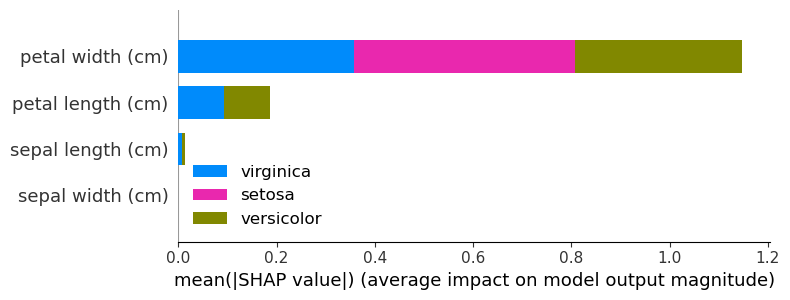

In [55]:
# Summarize the feature importance
shap.summary_plot(shap_values, X_test, feature_names=iris.feature_names, class_names=iris.target_names)

In [56]:
## Your turn, try to change the machine learning model to random forest or xgboost